<a href="https://colab.research.google.com/github/eduardogn/jupyter_notebook_projects/blob/main/csv_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Step 2: Mount your Google Drive
drive.mount('/content/drive')

# Step 3: Define the path to your CSV file
file_path = '/content/drive/My Drive/payments.csv'

# Step 4: Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


Mounted at /content/drive


<ipython-input-1-8660fe474828>:14: DtypeWarning: Columns (76,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,id,Created date (UTC),Amount,Amount Refunded,Currency,Captured,Converted Amount,Converted Amount Refunded,Converted Currency,Decline Reason,...,UTM Term,Application Fee,Application ID,Destination,Transfer,Transfer Group,Invoice number (metadata),OrgCode (metadata),EmailAddress (metadata),OrgName (metadata)
0,ch_3PY5hKCjVhqGlPNA0LniRyJj,2024-07-02 12:20:39,999.00,0.0,usd,True,999.00,0.0,usd,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ch_3PXrdXCjVhqGlPNA0IncXLvZ,2024-07-01 21:19:47,262.49,0.0,usd,False,262.49,0.0,usd,invalid_account,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ch_3PXhuPCjVhqGlPNA1y0aMd3o,2024-07-01 20:17:54,198.00,0.0,usd,False,198.00,0.0,usd,try_again_later,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ch_3PXqKDCjVhqGlPNA11R8sJF2,2024-07-01 19:55:45,79.38,0.0,usd,True,79.38,0.0,usd,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ch_3PXqJ5CjVhqGlPNA0oFzI8Uz,2024-07-01 19:54:36,249.00,0.0,usd,True,249.00,0.0,usd,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df['ARR value'] = df['Amount'] * 12

In [16]:
columns_to_keep = ['Created date (UTC)','Amount','Currency','Status','Customer Email','Description','ARR value']
new_df = df[columns_to_keep]
new_df.head()

,Created date (UTC),Amount,Currency,Status,Customer Email,Description,ARR value
0,2024-07-02 12:20:39,999.00,usd,Paid,development@3birds.net,Invoice BE488B9D-0059,11988.00
1,2024-07-01 21:19:47,262.49,usd,Failed,hcoleman@localclarity.com,Datashake | Overage Charge | User: 906 | Amoun...,3149.88
2,2024-07-01 20:17:54,198.00,usd,Failed,reviewshake@getthematic.com,Invoice 8BA3E817-0003,2376.00
3,2024-07-01 19:55:45,79.38,usd,Paid,sbhabad@vizium.com,Datashake | Overage Charge | User: 1843 | Amou...,952.56
4,2024-07-01 19:54:36,249.00,usd,Paid,sbhabad@vizium.com,Invoice 9FC66446-0045,2988.00


In [17]:
pattern1 = "Overage"
filtered_df = new_df[(new_df['Status'] == 'Paid')  &
    ~new_df['Description'].str.contains(pattern1, case=False, na=False)]

filtered_df.loc[:, 'Created date (UTC)'] = pd.to_datetime(filtered_df['Created date (UTC)'])
filtered_df.loc[:, 'year_month'] = filtered_df['Created date (UTC)'].dt.strftime('%Y-%m')
filtered_df.head()

<ipython-input-17-3bdf7d9e2660>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'year_month'] = filtered_df['Created date (UTC)'].dt.strftime('%Y-%m')


,Created date (UTC),Amount,Currency,Status,Customer Email,Description,ARR value,year_month
0,2024-07-02 12:20:39,999.0,usd,Paid,development@3birds.net,Invoice BE488B9D-0059,11988.0,2024-07
4,2024-07-01 19:54:36,249.0,usd,Paid,sbhabad@vizium.com,Invoice 9FC66446-0045,2988.0,2024-07
5,2024-07-01 19:21:13,423.0,usd,Paid,operations@issuu.com,Invoice 11C12F4E-0050,5076.0,2024-07
6,2024-07-01 18:25:05,423.0,usd,Paid,sasha2@somastream.com,Invoice 1225F063-0006,5076.0,2024-07
11,2024-07-01 06:48:17,498.0,usd,Paid,post@ntmedia.solutions,Invoice E648037A-0033,5976.0,2024-07


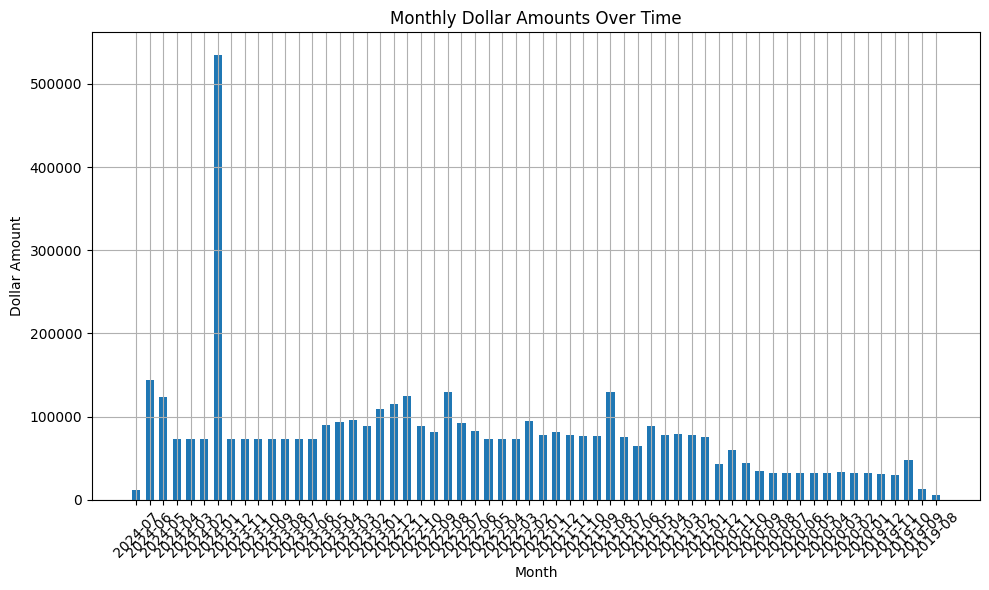

In [21]:
plt.figure(figsize=(10, 6))
x = filtered_df['year_month']
y = filtered_df['ARR value']
plt.bar(x, y, width=0.6, align='center')
plt.title('Monthly Dollar Amounts Over Time')
plt.xlabel('Month')
plt.ylabel('Dollar Amount')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()